# Feature Extraction and Fine Tuning using Tensorflow

## Become one with data

>Import Helper Functions (helper_functions.py)




In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

--2023-08-10 09:35:41--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-08-10 09:35:42 (86.3 MB/s) - ‘helper_functions.py’ saved [10246/10246]







>Importing data and check number of files and directorirs in that data

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data('10_food_classes_10_percent.zip')

--2023-08-10 09:35:49--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 173.194.202.128, 173.194.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   134MB/s    in 1.2s    

2023-08-10 09:35:51 (134 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
walk_through_dir('10_food_classes_10_percent')

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/c

## Data Preprocessing

> Saving train and test locations as train_dir and test_dir

In [ ]:
train_dir = '10_food_classes_10_percent/train'
test_dir = '10_food_classes_10_percent/test'

>Extracting files as data for model using tensorflow `image_dataset_from_directory` function

In [ ]:
import tensorflow as tf

train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 batch_size=32,
                                                                 label_mode='categorical',
                                                                 image_size=(224,224))

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                               batch_size=32,
                                                               label_mode='categorical',
                                                               image_size=(224,224))

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


> Create Augmented layer for input images. This layer is a type of `Sequentail` model from `keras`

In [ ]:
from tensorflow.keras import layers

data_augmented = tf.keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomWidth(0.2),
    layers.RandomHeight(0.2),
    layers.RandomZoom(0.2),
    layers.RandomRotation(0.2)
],name='Augmented_layer')

## Feature Extraction Model Building

> Functional Model using EfficientNetB0 model already prepared with layers

In [ ]:
from keras.engine.sequential import training
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=(224,224,3),name='Input_layer')

x = data_augmented(inputs)

x = base_model(x,training=False)

x = layers.GlobalAveragePooling2D()(x)

outputs = layers.Dense(10,activation='softmax')(x)

model_1 = tf.keras.Model(inputs,outputs)

model_1.compile(loss='categorical_crossentropy',
                metrics=['accuracy'],
                optimizer='adam')

16705208/16705208 [==============================] - 0s 0us/step


> Creating a checkpoint for using the same model with weights it trained with

In [ ]:
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,monitor='val_accuracy',save_weights_only=True,save_best_only=True,save_freq='epoch')

> Training model and save history in history_1 and saving ModelCheckpoint callback

In [ ]:
initial_epochs = 5

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=int(0.25*len(test_data)),
                        callbacks=[checkpoint_callback,create_tensorboard_callback(dir_name='tensorflow',experiment_name='Model_1_10_percent_feature_extraction')])

Saving TensorBoard log files to: tensorflow/Model_1_10_percent_feature_extraction/20230810-093814
Epoch 1/5
24/24 [==============================] - 39s 916ms/step - loss: 1.9158 - accuracy: 0.4107 - val_loss: 1.3850 - val_accuracy: 0.6842
Epoch 2/5
24/24 [==============================] - 17s 663ms/step - loss: 1.2618 - accuracy: 0.7187 - val_loss: 0.9818 - val_accuracy: 0.7845
Epoch 3/5
24/24 [==============================] - 12s 491ms/step - loss: 0.9682 - accuracy: 0.7520 - val_loss: 0.7586 - val_accuracy: 0.8372
Epoch 4/5
24/24 [==============================] - 12s 446ms/step - loss: 0.8132 - accuracy: 0.8040 - val_loss: 0.7003 - val_accuracy: 0.8257
Epoch 5/5
24/24 [==============================] - 12s 461ms/step - loss: 0.7208 - accuracy: 0.8160 - val_loss: 0.6451 - val_accuracy: 0.8273


In [ ]:
feature_results = model_1.evaluate(test_data)

79/79 [==============================] - 10s 122ms/step - loss: 0.6261 - accuracy: 0.8480


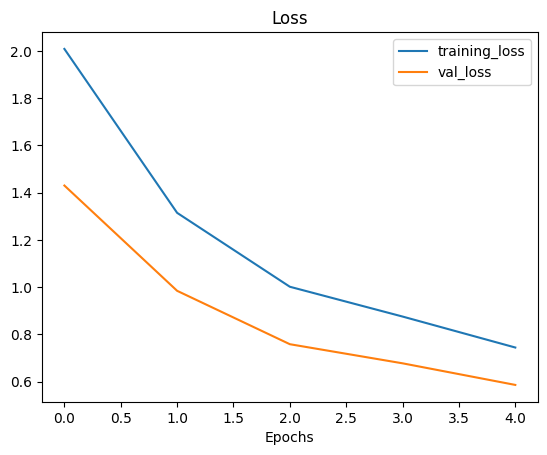

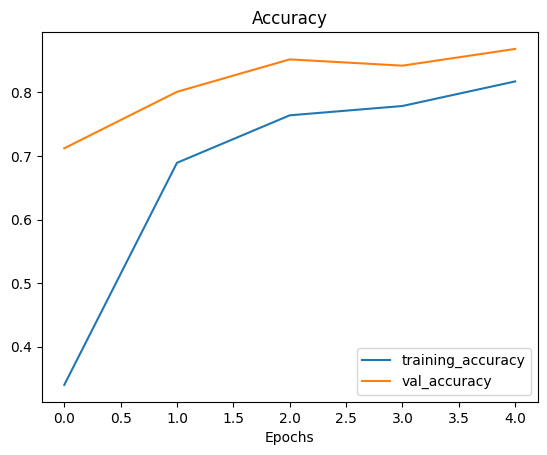

In [ ]:
plot_loss_curves(history_1)

In [ ]:
model_1.layers

In [ ]:
for layer in model_1.layers:
  print(layer.trainable)

True
True
False
True
True


> Checking Number of layers in base_model and which are trainable

In [ ]:
for layer_number,layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_2 False
1 rescaling_2 False
2 normalization_1 False
3 rescaling_3 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [ ]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 Augmented_layer (Sequential  (None, None, None, 3)    0         
 )                                                               
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainabl

## Finetune Model Building

> Setting last ten 10 only for training and remaining non trainable

In [ ]:
base_model.trainable = True

for layer in base_model.layers[:-10]:
  layer.trainable = False

model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=['accuracy'])

In [ ]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number,layer.name,layer.trainable)

0 input_2 False
1 rescaling_2 False
2 normalization_1 False
3 rescaling_3 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

> Fitting model and save in history_2

In [ ]:
history_2 = model_1.fit(train_data,
                        epochs=initial_epochs+5,
                        initial_epoch=history_1.epoch[-1],
                        validation_data=test_data,
                        validation_steps=int(0.25*len(test_data)),
                        steps_per_epoch=len(train_data),
                        callbacks=[create_tensorboard_callback(dir_name='tensorflow',experiment_name='fine_tune_model')])

Saving TensorBoard log files to: tensorflow/fine_tune_model/20230804-060949
Epoch 5/10
24/24 [==============================] - 24s 516ms/step - loss: 0.6360 - accuracy: 0.8267 - val_loss: 0.5175 - val_accuracy: 0.8438
Epoch 6/10
24/24 [==============================] - 12s 489ms/step - loss: 0.5007 - accuracy: 0.8667 - val_loss: 0.4224 - val_accuracy: 0.8799
Epoch 7/10
24/24 [==============================] - 10s 391ms/step - loss: 0.4649 - accuracy: 0.8653 - val_loss: 0.4280 - val_accuracy: 0.8701
Epoch 8/10
24/24 [==============================] - 11s 432ms/step - loss: 0.4244 - accuracy: 0.8720 - val_loss: 0.4195 - val_accuracy: 0.8717
Epoch 9/10
24/24 [==============================] - 14s 574ms/step - loss: 0.3605 - accuracy: 0.9013 - val_loss: 0.4421 - val_accuracy: 0.8783
Epoch 10/10
24/24 [==============================] - 13s 464ms/step - loss: 0.3431 - accuracy: 0.8987 - val_loss: 0.4264 - val_accuracy: 0.8717


In [ ]:
fine_tune_results = model_1.evaluate(test_data)

79/79 [==============================] - 9s 103ms/step - loss: 0.4331 - accuracy: 0.8620


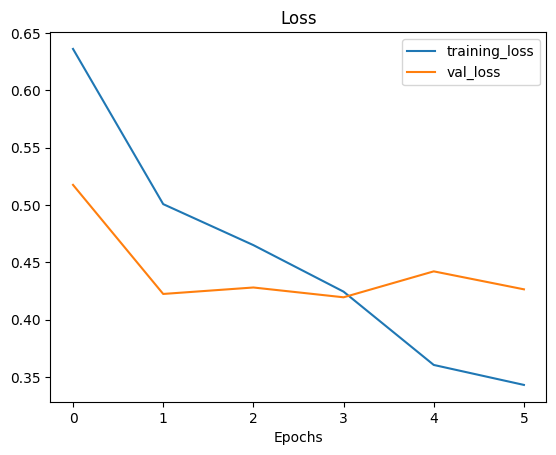

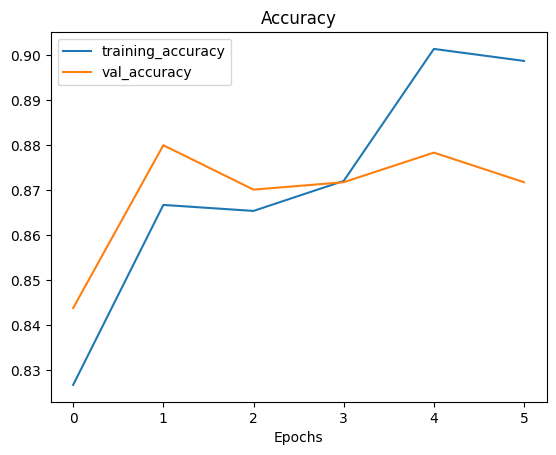

In [ ]:
plot_loss_curves(history_2)

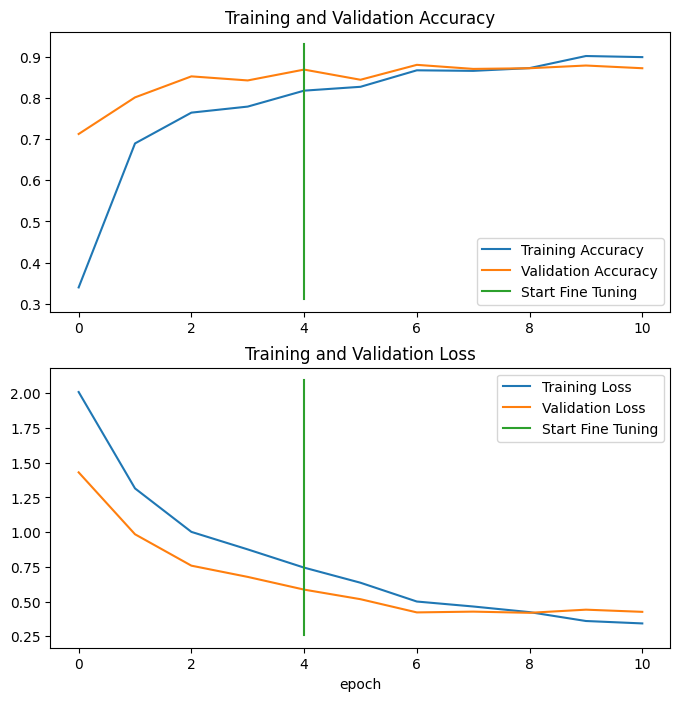

In [ ]:
from helper_functions import compare_historys

compare_historys(original_history=history_1,
                 new_history=history_2)

## Evaluating Model

In [ ]:
class_names = train_data.class_names

> Plot a random single image with prediction

1/1 [==============================] - 0s 68ms/step


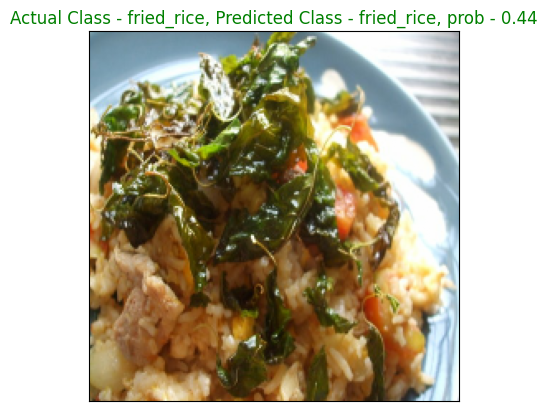

In [ ]:
import random
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from helper_functions import load_and_prep_image

class_name = random.choice(class_names)
filename = random.choice(os.listdir(test_dir + '/' + class_name))
filepath = test_dir + '/' + class_name + '/' + filename
img = load_and_prep_image(filepath,scale=False)
pred_prob = model_1.predict(tf.expand_dims(img,axis=0))
pred_class = class_names[pred_prob.argmax()]
plt.figure()
fig = plt.imshow(img/255.)
if pred_class==class_name:
  color='g'
else:
  color='r'
plt.title(f"Actual Class - {class_name}, Predicted Class - {pred_class}, prob - {pred_prob.max():.2f}",c=color)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

> Plotting 9 random images with prediction

1/1 [==============================] - 0s 28ms/step


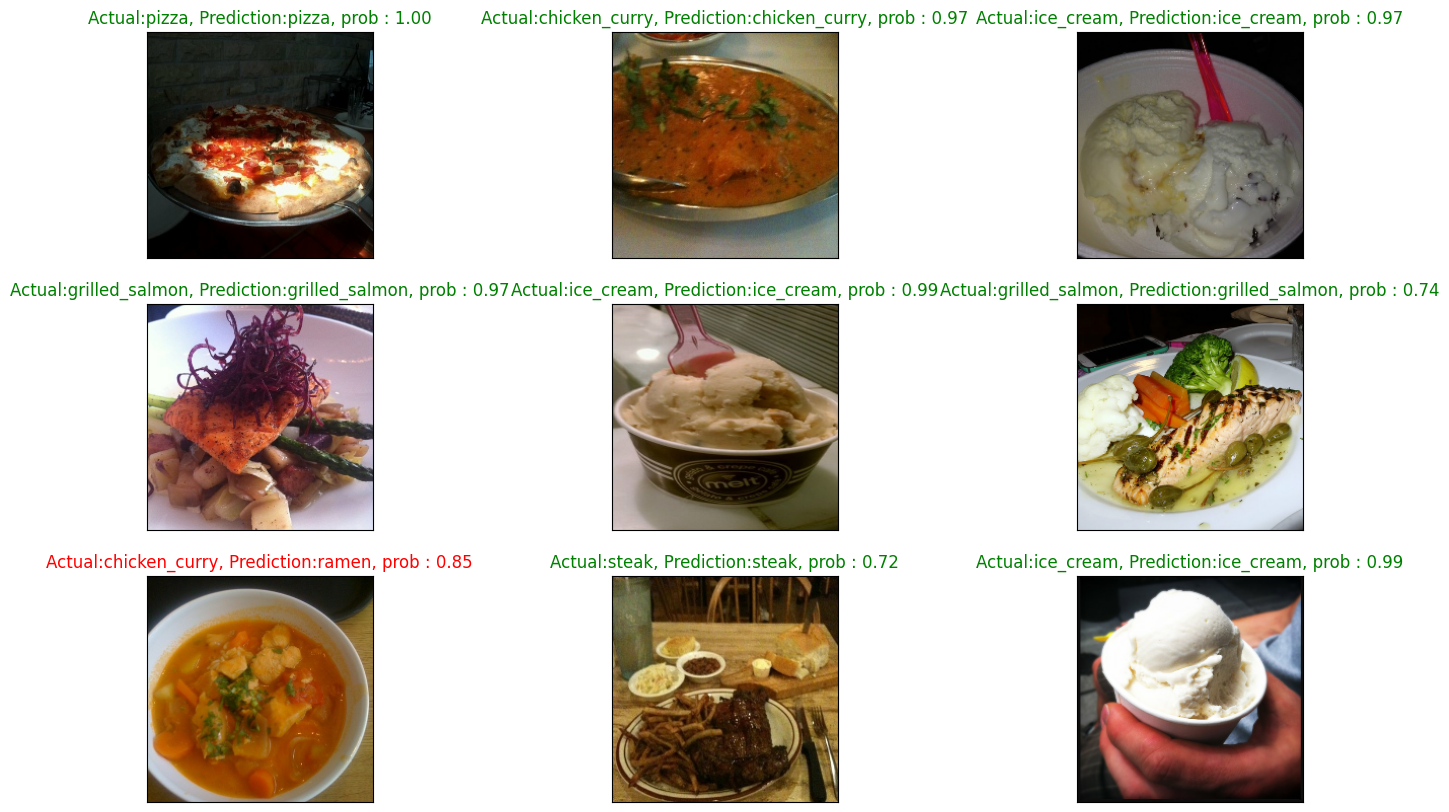

In [ ]:
plt.figure(figsize=(17, 10))
for i in range(9):
  class_name = random.choice(class_names)
  filename = random.choice(os.listdir(test_dir + '/' + class_name))
  filepath = test_dir + '/' + class_name + '/' + filename

  img = load_and_prep_image(filepath, scale=False)
  pred_prob = model_1.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[pred_prob.argmax()]

  plt.subplot(3, 3, i+1)
  fig = plt.imshow(img/255.)
  if class_name == pred_class:
    title_color = "g"
  else:
    title_color = "r"
  plt.title(f"Actual:{class_name}, Prediction:{pred_class}, prob : {pred_prob.max():.2f}", c=title_color)
  fig.axes.get_xaxis().set_visible(False)
  fig.axes.get_yaxis().set_visible(False)


> Creating Non shuffled data for confusion Matrix

In [ ]:
test_data_not_shuffled = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                             label_mode='categorical',
                                                                             batch_size=32,
                                                                             shuffle=False, # Non Shuffled Data for confusion matrix
                                                                             image_size=(224,224))

Found 2500 files belonging to 10 classes.


In [ ]:
model_1.evaluate(test_data_not_shuffled)

79/79 [==============================] - 9s 109ms/step - loss: 0.4331 - accuracy: 0.8620


[0.43314051628112793, 0.8619999885559082]

In [ ]:
pred_probs = model_1.predict(test_data_not_shuffled)

79/79 [==============================] - 11s 136ms/step


In [ ]:
len(pred_probs)

2500

In [ ]:
pred_probs.shape

(2500, 10)

> True Test Labels

In [ ]:
ylabels = []

for images, labels in test_data_not_shuffled.unbatch():
  ylabels.append(labels.numpy().argmax())

ylabels[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
pred_probs[:10]

array([[9.58173215e-01, 2.36346343e-04, 1.82547927e-04, 1.38407806e-03,
        1.36874642e-05, 6.34605976e-06, 2.80615623e-05, 3.84629369e-02,
        1.47109991e-03, 4.17305819e-05],
       [8.62038136e-01, 5.47450909e-04, 5.73516823e-04, 1.10257231e-03,
        1.17836916e-03, 1.22694066e-04, 4.00788413e-04, 1.33279130e-01,
        6.03551161e-04, 1.53794535e-04],
       [7.27210581e-01, 4.37157199e-04, 1.38808347e-04, 4.76191170e-04,
        1.45952377e-04, 3.29572395e-05, 5.52329011e-02, 2.16040343e-01,
        2.58401124e-04, 2.67367668e-05],
       [8.52224171e-01, 1.22479768e-02, 2.04857960e-02, 4.67953309e-02,
        3.22394981e-03, 3.81998980e-04, 1.35363331e-02, 4.97047231e-02,
        1.05397787e-03, 3.45774577e-04],
       [6.03642225e-01, 2.93398625e-04, 7.82457963e-02, 2.31448427e-01,
        6.74696220e-03, 5.56404353e-04, 6.73726276e-02, 6.91569829e-03,
        2.87805451e-03, 1.90046534e-03],
       [9.92768407e-01, 3.40367842e-06, 1.64533063e-04, 2.10512459e-04,
   

In [ ]:
pred_classes = pred_probs.argmax(axis=1)

pred_classes[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
sklearn_accuracy = accuracy_score(ylabels, pred_classes)
sklearn_accuracy

0.862

Plotting Confusion Matrix

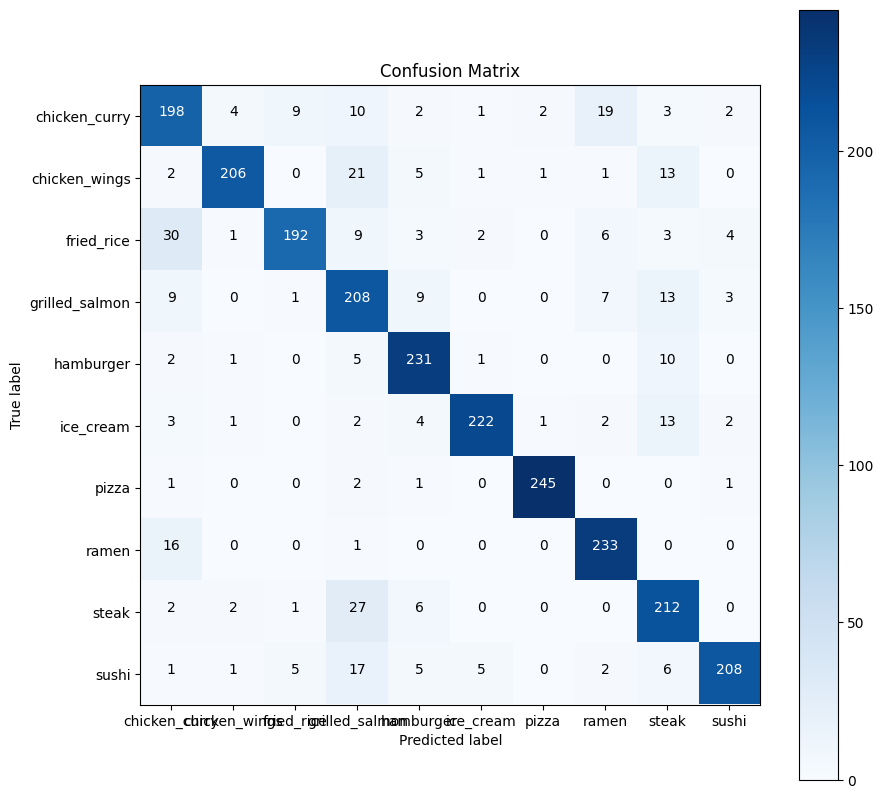

In [ ]:
from helper_functions import make_confusion_matrix

make_confusion_matrix(y_true=ylabels,y_pred=pred_classes,classes=class_names,text_size=10)

## Uploading to Tensorboard

In [ ]:
!tensorboard dev upload --logdir ./tensorflow/ \
  --name "10_classes_10_models - Feature Extraction vs Fine Tune model" \
  --description "Comparing two different model architectures using 10% of training images" \
  --one_shot

2023-08-04 07:31:55.293916: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./tensorflow/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

To sign in with the TensorBoard uploader:

1. On your computer or phone, visit:

   https://www.google.com/device

2. Sign in with your Google account, then enter:

   KWK-QYH-XYB



New experiment created. View your TensorBoard at: https://tensorboard.dev/experi